<a href="https://colab.research.google.com/github/snehakarki01/Electronic-Data-Analysis--Medical-Appoinment-Data/blob/main/Medical_Appoinment_Electronic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@Author Sneha Karki


In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [7]:
base_data = pd.read_csv('/content/Data (1).csv')

In [8]:
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1.0,1.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64726,9.677542e+12,5417381,F,2016-03-01T18:24:24Z,2016-05-20T00:00:00Z,24,JARDIM CAMBURI,0,0.0,0.0,0.0,0.0,0.0,Yes
64727,4.775398e+14,5671583,F,2016-05-06T19:29:59Z,2016-05-06T00:00:00Z,29,JARDIM CAMBURI,0,0.0,0.0,0.0,0.0,0.0,No
64728,5.952616e+12,5413380,F,2016-03-01T09:33:44Z,2016-05-06T00:00:00Z,35,JARDIM CAMBURI,0,0.0,0.0,0.0,0.0,1.0,Yes
64729,9.847763e+14,5414803,F,2016-03-01T11:45:39Z,2016-05-13T00:00:00Z,41,JARDIM CAMBURI,0,0.0,0.0,0.0,0.0,0.0,Yes


In [9]:
base_data.shape

(64731, 14)

In [10]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64731 entries, 0 to 64730
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       64731 non-null  float64
 1   AppointmentID   64731 non-null  int64  
 2   Gender          64731 non-null  object 
 3   ScheduledDay    64731 non-null  object 
 4   AppointmentDay  64731 non-null  object 
 5   Age             64731 non-null  int64  
 6   Neighbourhood   64731 non-null  object 
 7   Scholarship     64731 non-null  int64  
 8   Hipertension    64730 non-null  float64
 9   Diabetes        64730 non-null  float64
 10  Alcoholism      64730 non-null  float64
 11  Handcap         64730 non-null  float64
 12  SMS_received    64730 non-null  float64
 13  No-show         64730 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 6.9+ MB


In [11]:
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [12]:

base_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1.0,1.0,0.0,0.0,0.0,No


In [13]:
base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek

In [14]:
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [15]:
base_data['sch_weekday'].value_counts()

sch_weekday
1    16038
2    13435
0    13048
4    11319
3    10879
5       12
Name: count, dtype: int64

In [16]:
base_data['app_weekday'].value_counts()

app_weekday
1    16131
0    13428
2    12892
4    12213
3    10067
Name: count, dtype: int64

In [17]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [18]:
base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})


In [19]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [20]:
base_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64731 entries, 0 to 64730
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PatientId       64731 non-null  float64       
 1   AppointmentID   64731 non-null  int64         
 2   Gender          64731 non-null  object        
 3   ScheduledDay    64731 non-null  datetime64[ns]
 4   AppointmentDay  64731 non-null  datetime64[ns]
 5   Age             64731 non-null  int64         
 6   Neighbourhood   64731 non-null  object        
 7   Scholarship     64731 non-null  int64         
 8   Hypertension    64730 non-null  float64       
 9   Diabetes        64730 non-null  float64       
 10  Alcoholism      64730 non-null  float64       
 11  Handicap        64730 non-null  float64       
 12  SMSReceived     64730 non-null  float64       
 13  NoShow          64730 non-null  object        
 14  sch_weekday     64731 non-null  int32         
 15  ap

In [21]:
base_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)


In [22]:
base_data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1.0,0.0,0.0,0.0,0.0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0.0,0.0,0.0,0.0,0.0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0.0,0.0,0.0,0.0,0.0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0.0,0.0,0.0,0.0,0.0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1.0,1.0,0.0,0.0,0.0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64726,F,2016-03-01,2016-05-20,24,0,0.0,0.0,0.0,0.0,0.0,Yes,1,4
64727,F,2016-05-06,2016-05-06,29,0,0.0,0.0,0.0,0.0,0.0,No,4,4
64728,F,2016-03-01,2016-05-06,35,0,0.0,0.0,0.0,0.0,1.0,Yes,1,4
64729,F,2016-03-01,2016-05-13,41,0,0.0,0.0,0.0,0.0,0.0,Yes,1,4


In [23]:
base_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64731 entries, 0 to 64730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          64731 non-null  object        
 1   ScheduledDay    64731 non-null  datetime64[ns]
 2   AppointmentDay  64731 non-null  datetime64[ns]
 3   Age             64731 non-null  int64         
 4   Scholarship     64731 non-null  int64         
 5   Hypertension    64730 non-null  float64       
 6   Diabetes        64730 non-null  float64       
 7   Alcoholism      64730 non-null  float64       
 8   Handicap        64730 non-null  float64       
 9   SMSReceived     64730 non-null  float64       
 10  NoShow          64730 non-null  object        
 11  sch_weekday     64731 non-null  int32         
 12  app_weekday     64731 non-null  int32         
dtypes: datetime64[ns](2), float64(5), int32(2), int64(2), object(2)
memory usage: 5.9+ MB


In [24]:
base_data.describe()


,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,64731,64731,64731.000000,64731.000000,64730.000000,64730.000000,64730.000000,64730.000000,64730.000000,64731.000000,64731.000000
mean,2016-05-03 17:23:33.338276864,2016-05-13 15:28:05.961903872,36.678160,0.101142,0.195752,0.069133,0.032211,0.022602,0.297219,1.867436,1.868780
min,2015-11-10 00:00:00,2016-04-29 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-27 00:00:00,2016-05-05 00:00:00,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-05 00:00:00,2016-05-12 00:00:00,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-16 00:00:00,2016-05-19 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-05-31 00:00:00,2016-05-31 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,4.000000
std,NaN,NaN,22.923713,0.301519,0.396781,0.253683,0.176561,0.160428,0.457037,1.380468,1.404278


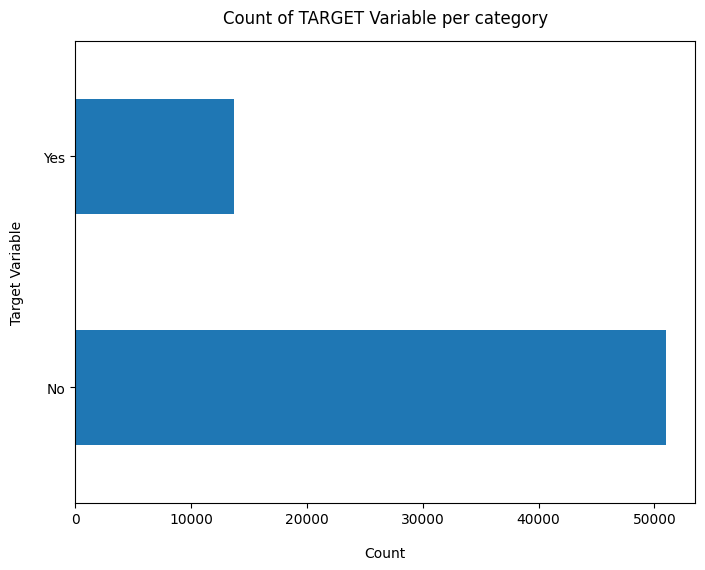

In [25]:
base_data['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [26]:
100*base_data['NoShow'].value_counts()/len(base_data['NoShow'])


NoShow
No     78.764425
Yes    21.234030
Name: count, dtype: float64

In [27]:
base_data['NoShow'].value_counts()


NoShow
No     50985
Yes    13745
Name: count, dtype: int64

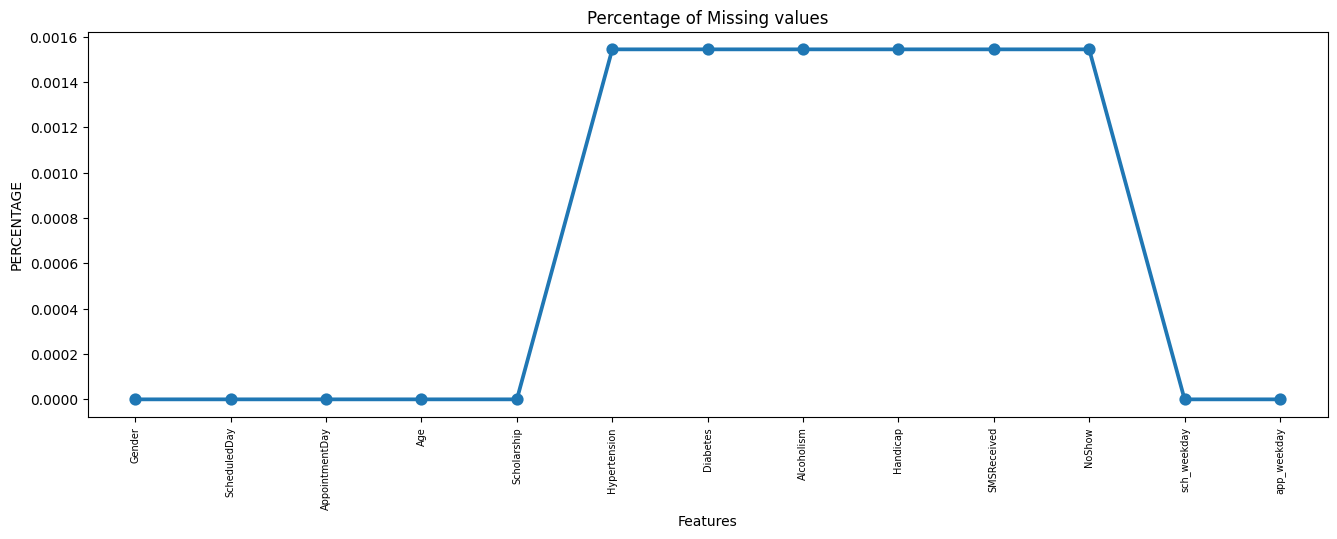

In [30]:
missing = pd.DataFrame((base_data.isnull().sum()) * 100 / base_data.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)  # Corrected x and y axis values
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("Features")  # Adding x-axis label
plt.show()

In [31]:
new_data = base_data.copy()

In [32]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64731 entries, 0 to 64730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          64731 non-null  object        
 1   ScheduledDay    64731 non-null  datetime64[ns]
 2   AppointmentDay  64731 non-null  datetime64[ns]
 3   Age             64731 non-null  int64         
 4   Scholarship     64731 non-null  int64         
 5   Hypertension    64730 non-null  float64       
 6   Diabetes        64730 non-null  float64       
 7   Alcoholism      64730 non-null  float64       
 8   Handicap        64730 non-null  float64       
 9   SMSReceived     64730 non-null  float64       
 10  NoShow          64730 non-null  object        
 11  sch_weekday     64731 non-null  int32         
 12  app_weekday     64731 non-null  int32         
dtypes: datetime64[ns](2), float64(5), int32(2), int64(2), object(2)
memory usage: 5.9+ MB


In [33]:
print(base_data['Age'].max())

115


In [34]:
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

base_data['Age_group'] = pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)

In [35]:
base_data.drop(['Age'], axis=1, inplace=True)

In [36]:
list(base_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- Gender ----------
Gender
F    41750
M    22981
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-04-29    3141
2016-05-03    3073
2016-05-02    3036
2016-05-10    2850
2016-05-05    2761
              ... 
2016-03-19       1
2016-01-27       1
2016-01-19       1
2016-02-15       1
2016-04-09       1
Name: count, Length: 99, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-05-12    3451
2016-05-16    3405
2016-05-11    3392
2016-05-19    3365
2016-05-30    3357
2016-05-09    3351
2016-05-17    3323
2016-05-18    3315
2016-05-02    3315
2016-05-03    3289
2016-05-10    3259
2016-05-05    3251
2016-04-29    3235
2016-05-04    3234
2016-05-31    3223
2016-05-13    3039
2016-05-24    3037
2016-05-20    3021
2016-05-25    2951
2016-05-06    2918
Name: count, dtype: int64
---------- Scholarship ----------
Scholarship
0    58184
1     6547
Name: count, dtype: int64
---------- Hypertension ----------
Hypertension
0.0    52059
1.0    1

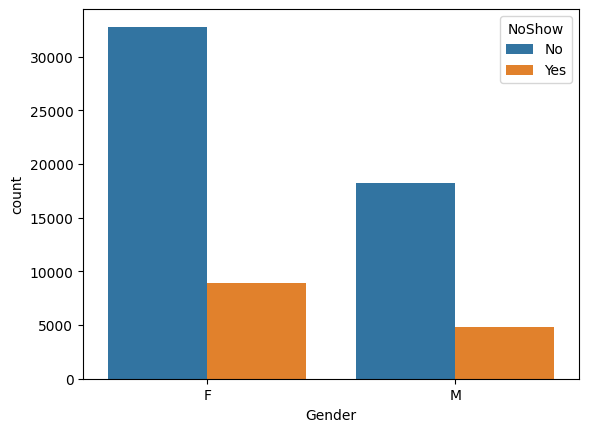

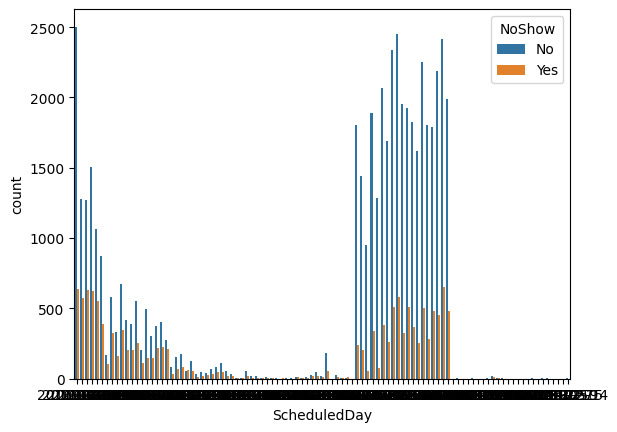

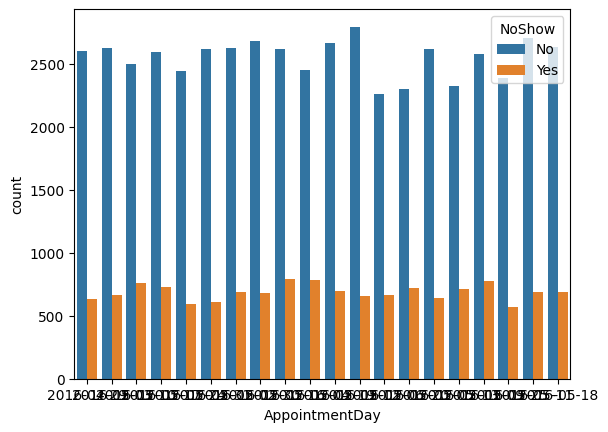

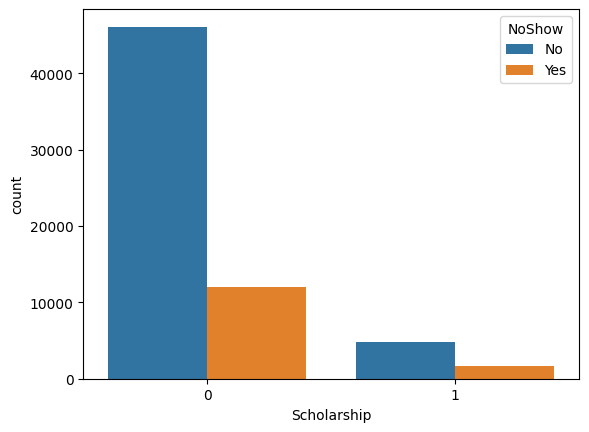

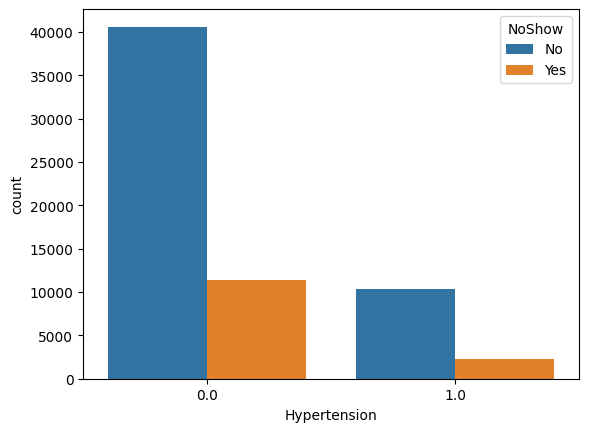

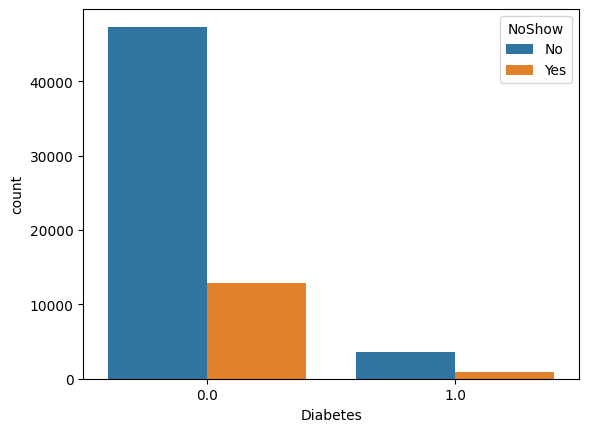

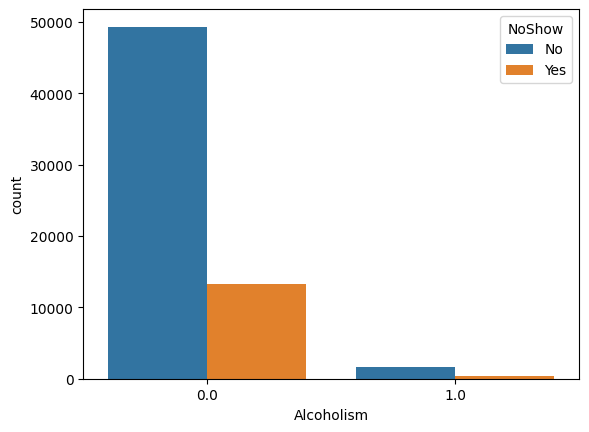

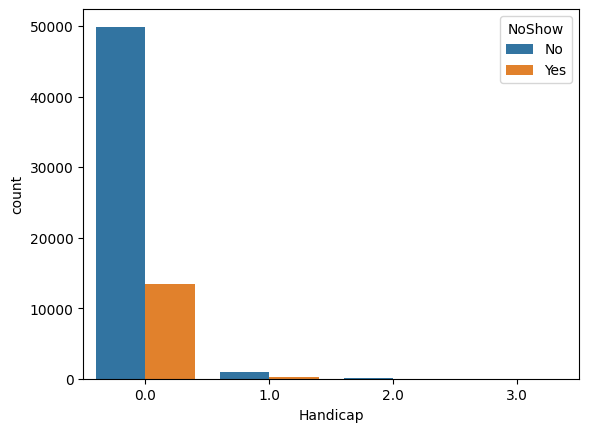

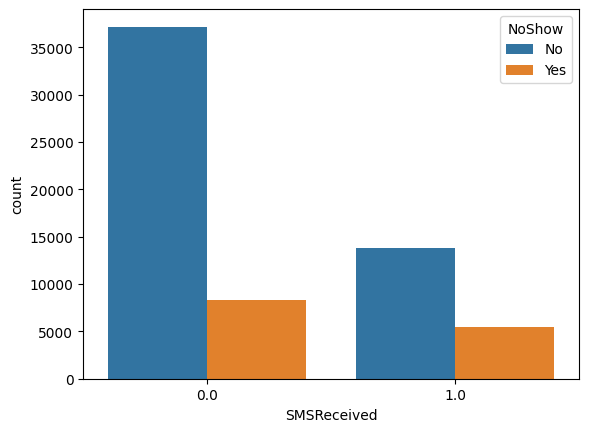

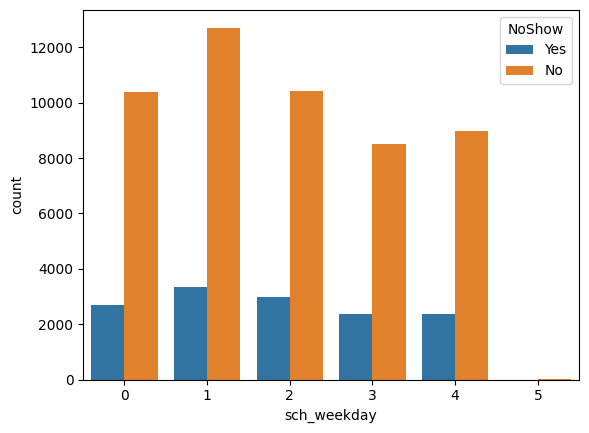

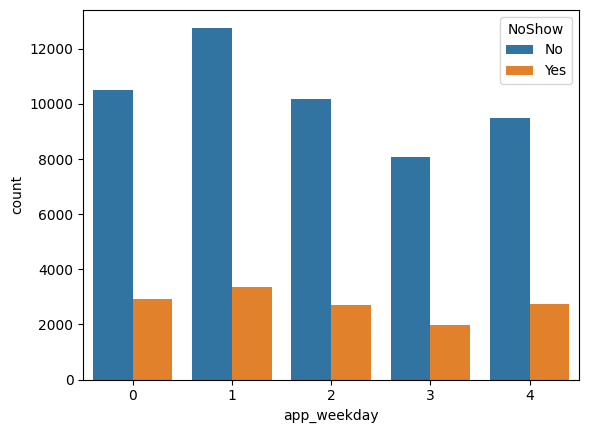

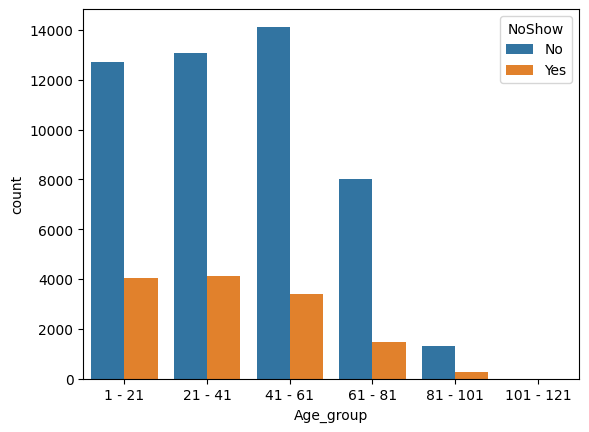

In [37]:
for i, predictor in enumerate(base_data.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(base_data[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=base_data, x=predictor, hue='NoShow')

In [38]:
base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)

In [39]:
base_data.NoShow.value_counts()

NoShow
0    50986
1    13745
Name: count, dtype: int64

In [40]:
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1.0,0.0,0.0,0.0,0.0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,0,0.0,0.0,0.0,0.0,0.0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,0,0.0,0.0,0.0,0.0,0.0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,0,0.0,0.0,0.0,0.0,0.0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,0,1.0,1.0,0.0,0.0,0.0,0,4,4,True,False,False,False,True,False,False,False


<Axes: >

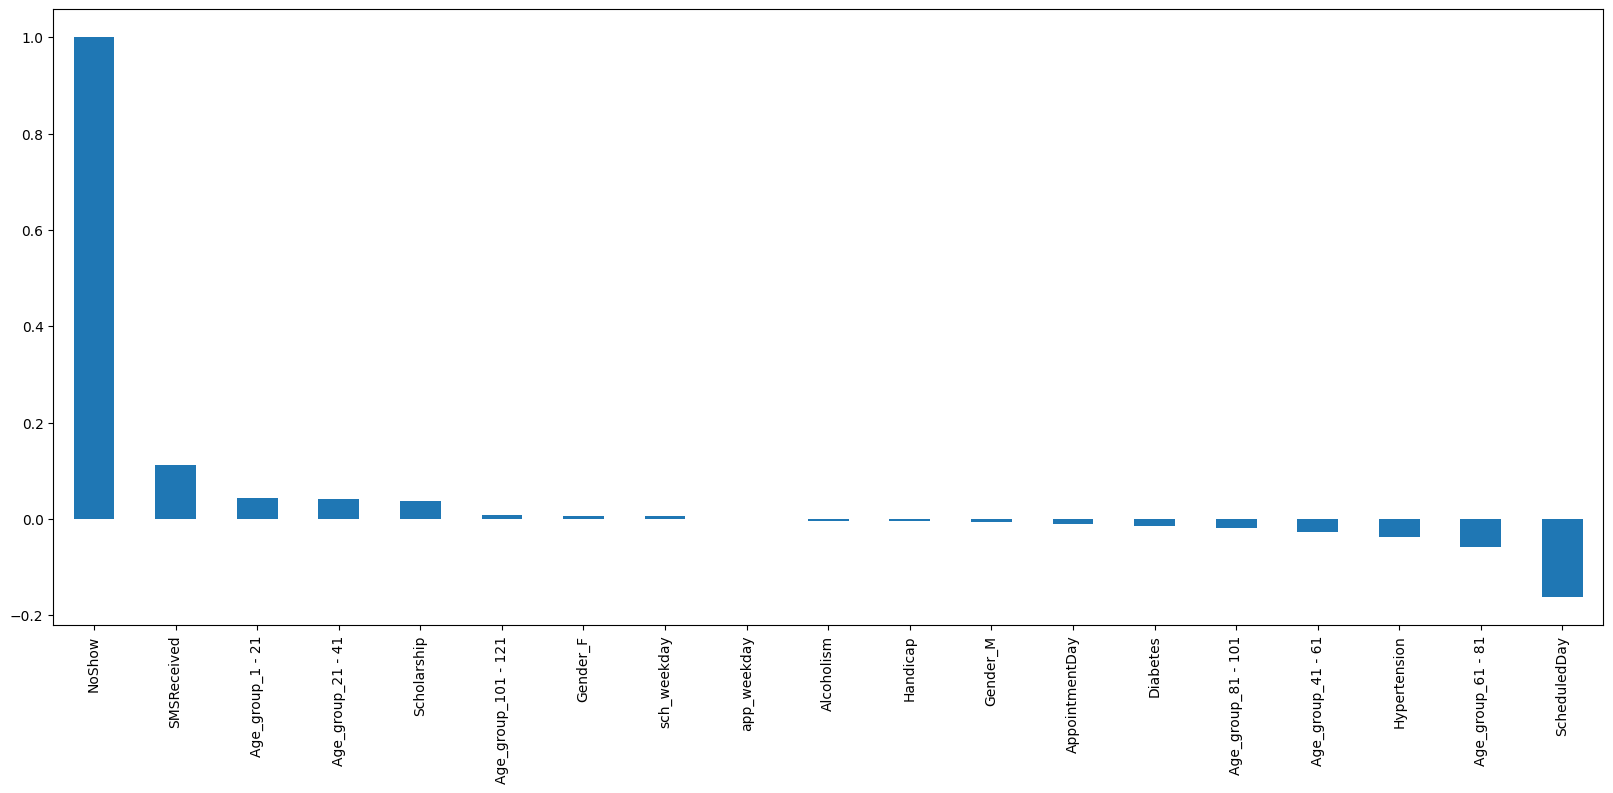

In [41]:
plt.figure(figsize=(20,8))
base_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

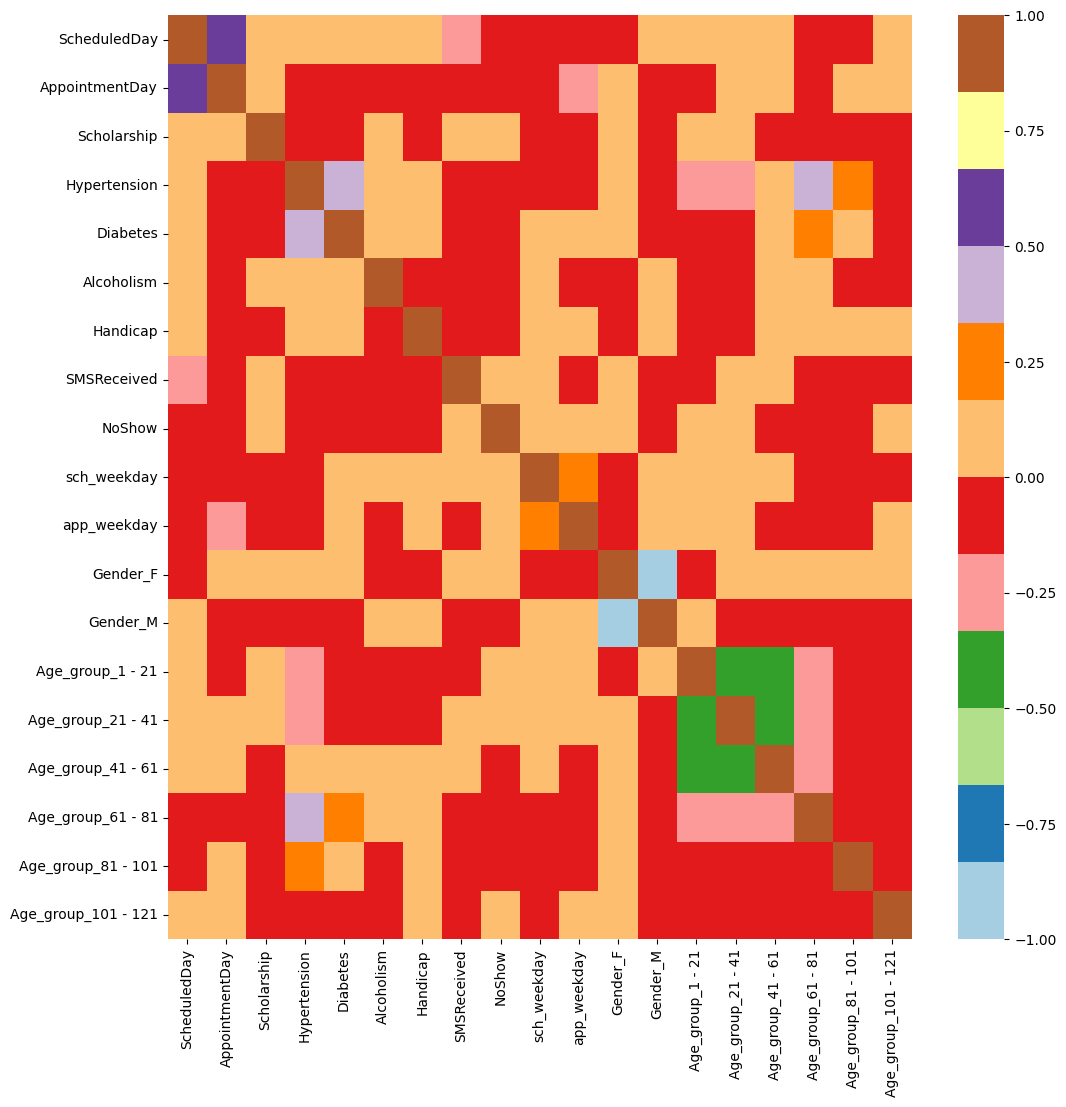

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies.corr(), cmap="Paired")

In [43]:
new_df1_target0=base_data.loc[base_data["NoShow"]==0]
new_df1_target1=base_data.loc[base_data["NoShow"]==1]

In [44]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()


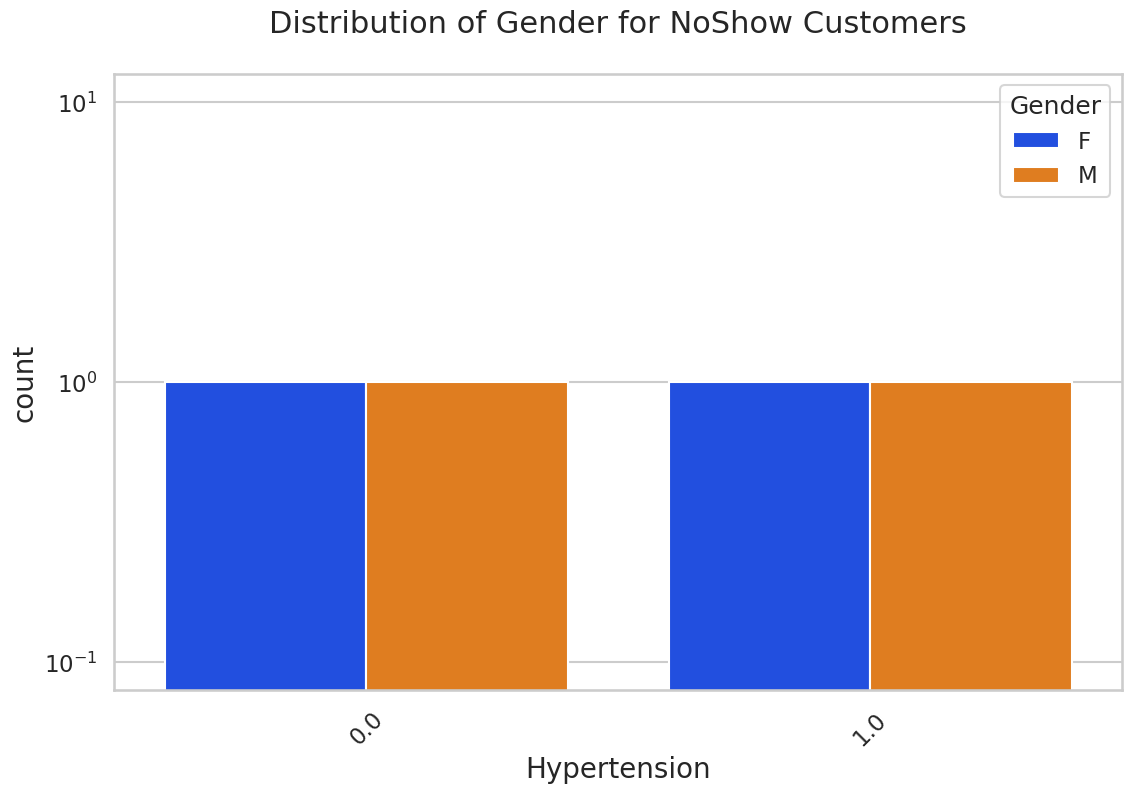

In [45]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

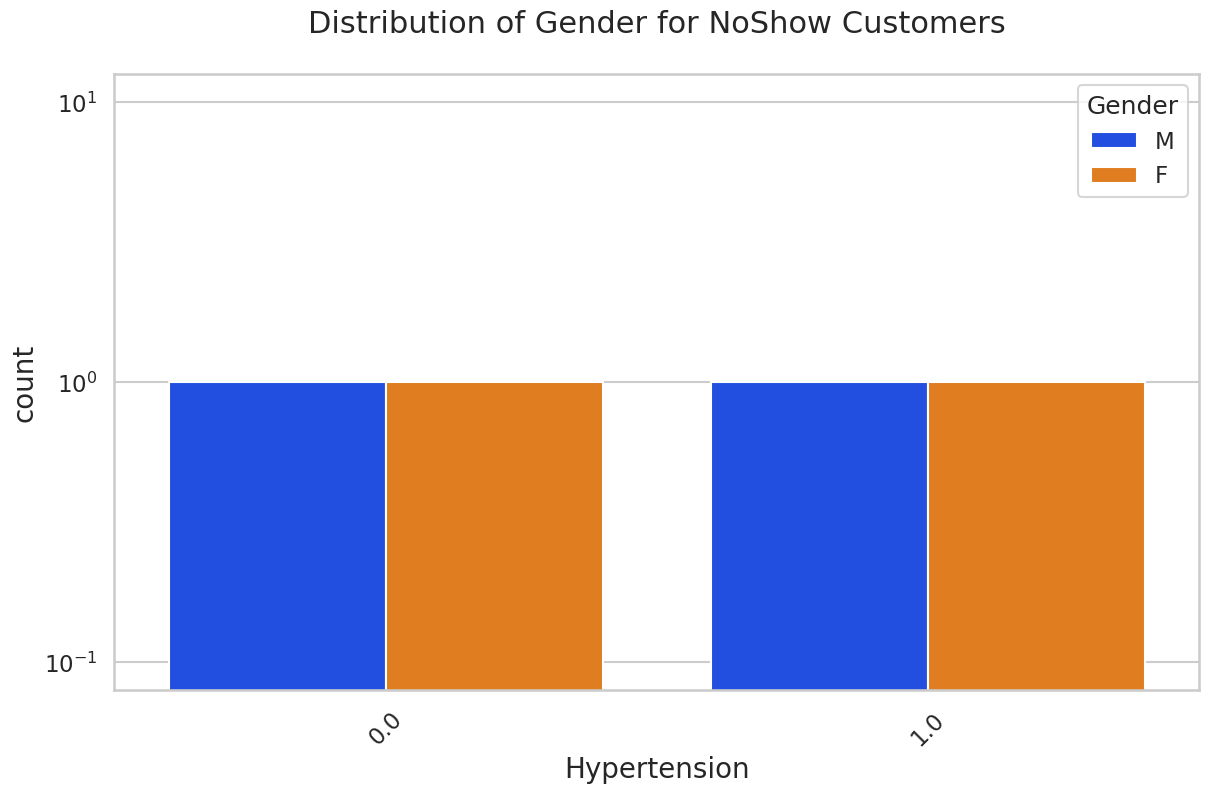

In [46]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

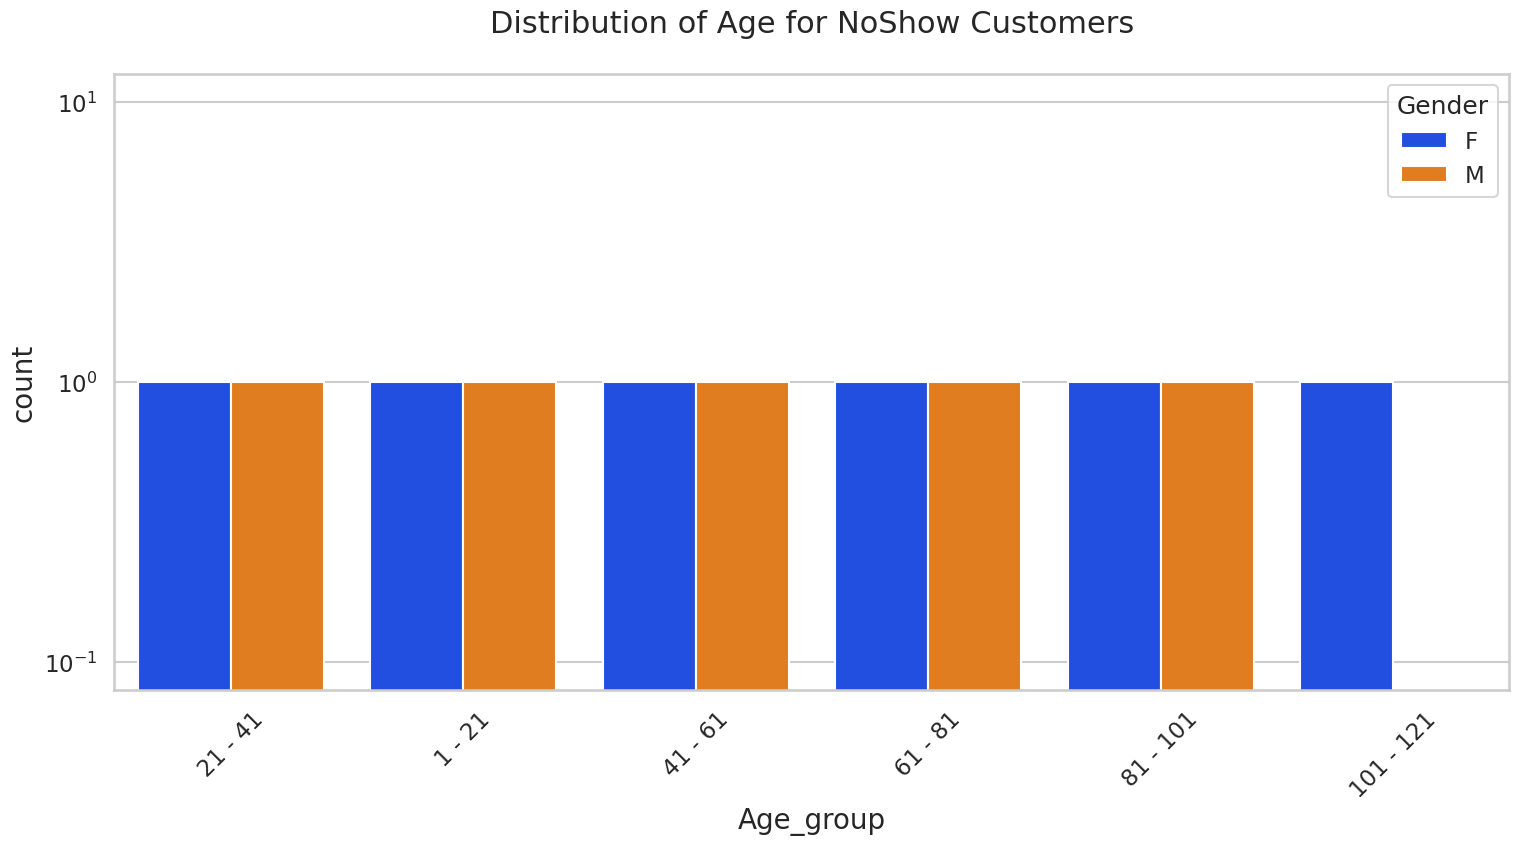

In [47]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

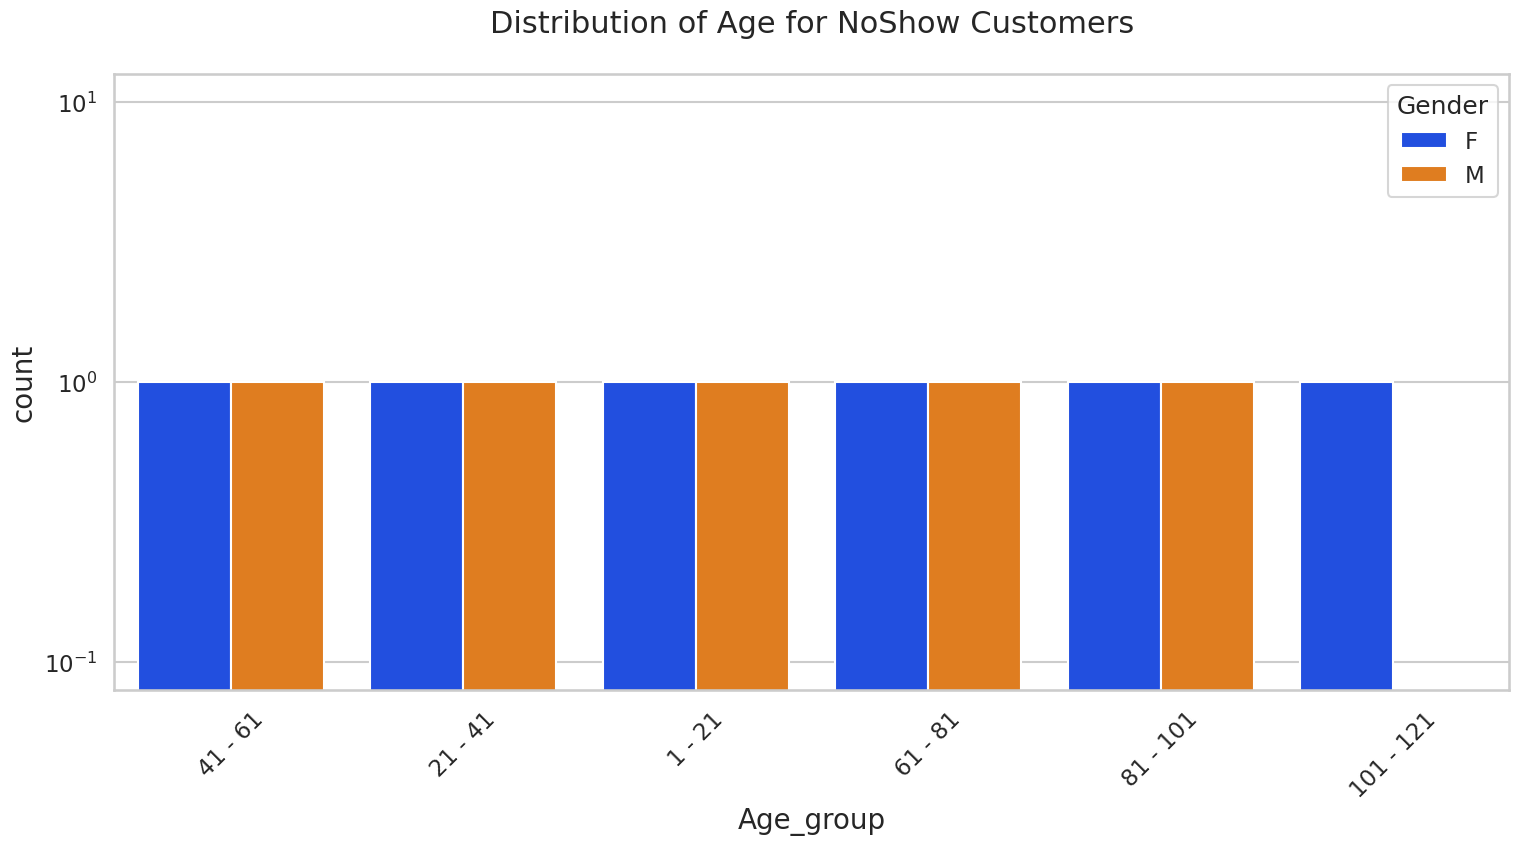

In [48]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')